# Overview to understand the lab


The main objective is to implement the linear regression by using:
*   **Automatic approach**: We use scikit-learn, because it avoid the step of finding the right hyperparameters ( learing rate, the epochs and the batchsize)
*   **Traditional approach** : the traditional consists of using the gradient descente algoritms to find the learning parameters. We can also use the normal equation approach. It allows us to find the exact or the optimum learning parameters. This approach is recommanded if the number of features < 10000

# 1-Useful libraries


In [ ]:
#we use pandas to manipulate dataset as frame
import pandas as pd
#We use numpy for matricial operation
import numpy as np
#matplotlib for plotting
import matplotlib.pyplot as plt
#sklearn is a ml lib that allows easily processing ml algorithsms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# 2-Data pre-processing:  ETL process

In [ ]:
#We use the read_csv to load the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
#quickly explore the frame content
df_train.head(10)
#The used dataset is a frame data composed of two columns.

#x =>feet of the home
#y =>price of the home
#The frame is composed of one feature and one label.
#It's a supervised learning algorithms because the dataset is labeled (x->y).
#The predicted values are continuous, so it is a regression problem.

#Because we have just one feature, so it is an univariate linear regression

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984
5,36,32.463875
6,12,10.780897
7,81,80.763399
8,25,24.612151
9,5,6.963319


In [ ]:
#we check the data size
print(df_train.shape)
print(df_test.shape)

(700, 2)
(300, 2)


In [ ]:
#When we look at the training data by quick way with the describe function
#I use the transpose() just for a good visibiliy
df_train.describe().transpose()
#wee see one missing value in the "y" column in the train dataset.

,count,mean,std,min,25%,50%,75%,max
x,700.0,50.000000,28.936317,0.000000,25.000000,49.00000,75.000000,100.000000
y,699.0,49.939869,29.109217,-3.839981,24.929968,48.97302,74.929911,108.871618


There are a great difference between isna() and isnull()
isnull() =>return (if the value is null) true or false
isna() => return the line (instance) that contains a NaN or Null value

In [ ]:
# lets look at it by the isnull function
df_train.isnull().sum()
#df_train[df_train['y']<0]

x    0
y    1
dtype: int64

In [ ]:
#lets look the instance data that contains the missing value
df_train[df_train.isna().any(axis=1)]

,x,y
213,40,NaN


In [ ]:
# Missing value in terms of ratio in the dataset
df_train.y.isnull().sum()/len(df_train.y)

0.0014285714285714286

In [ ]:
#When we look at the test data by quick way with the describe function
df_test.describe().transpose()
#In the test dataset, there is no any missing value.

#df_test[df_test['y']<0]

,count,mean,std,min,25%,50%,75%,max
x,300.0,50.936667,28.504286,0.000000,27.000000,53.000000,73.000000,100.000000
y,300.0,51.205051,29.071481,-3.467884,25.676502,52.170557,74.303007,105.591837


In [ ]:
#We delete all missing values in the training.
df_train.dropna(inplace=True)
#or we can use df_train.dropna()

In [ ]:
#We check the new training data size after deleting all missing values
df_train.shape
#we remark that only one instance was deleted

(699, 2)

# 3-Data exploration & analysis

In [ ]:
#Handle with Outliers into the training dataset
# calculate mean and std of data

data_std_y=df_train.y.std()
data_mean_y=df_train.y.mean()

data_std_x=df_train.x.std()
data_mean_x=df_train.x.mean()

# we use 3 stardart deviation to determine cut off point
lower_y, upper_y = data_mean_y- 3 * data_std_y, data_mean_y + 3 * data_std_y
lower_x, upper_x = data_mean_x- 3 * data_std_x, data_mean_x + 3 * data_std_x
print("For Y dimension; Std : {}, Mean : {}, Lower : {}, Upper : {}".format(data_std_y,data_mean_y,lower_y,upper_y))
print("For X dimension; Std : {}, Mean : {}, Lower : {}, Upper : {}".format(data_std_x,data_mean_x,lower_x,upper_x))

# detect outlier
outliers_std_x = [x for x in df_train.x if x < lower_x or x > upper_x]
outliers_std_y = [x for x in df_train.y if x < lower_y or x > upper_y]

For Y dimension; Std : 29.109217100389866, Mean : 49.93986917045776, Lower : -37.387782130711834, Upper : 137.26752047162736
For X dimension; Std : 28.954560214557873, Mean : 50.01430615164521, Lower : -36.84937449202841, Upper : 136.87798679531883


In [ ]:
#We see that our outlier list for X columns return empty, so there is no outlier in the dataset for X dimension.
outliers_std_x

[]

In [ ]:
outliers_std_y
#Also, we reach same result for Y dimension. Therefore, we do not need to remove outliers from our dataset.

[]

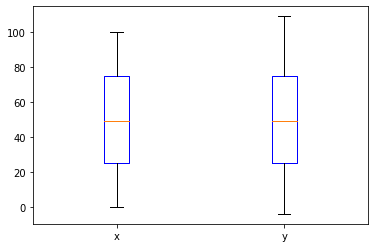

In [ ]:
#However, lets look at data by a visualization
# simple box-plot visualization
plt.boxplot([df_train.x,df_train.y], boxprops=dict(color='blue'), labels=['x','y'])
plt.show()

The box plot showd that the data set is normally distributed.
When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric.
Their are no outliers data

# 4-Prepare and plot data (x,y)(train,test)¶


In this section, we will prepare the dataset as input matrix by using numpy functions such as array() and reshape()

## 4.1-Prepare the (x, y) (train, test)

In [ ]:
#prepare data
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

#We transform the data as matrix because ML algorithms works well with matricial dot product information
#We transform the dataframe to matrix
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
#We reshape our data to apply Linear Regression formula, then we call Linear Regression function from Sckit-Learn library and predict our data.

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

## 4.2 Plot data the (x, y) (train, test)

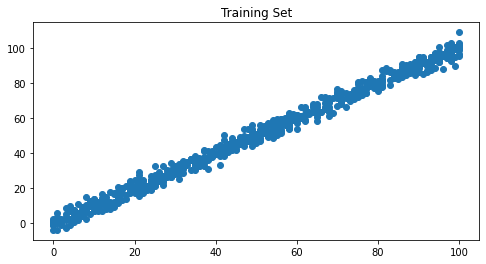

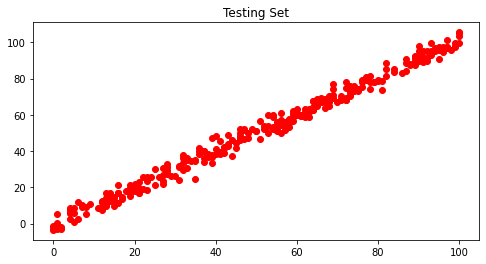

In [ ]:
#import matplotlib.pyplot as plt
#%matplotlib inline

#plot the training data
plt.figure(figsize=(8,4))
plt.title("Training Set")
plt.scatter(x_train,y_train)

#plot the test data
plt.figure(figsize=(8,4))
plt.title("Testing Set")
plt.scatter(x_test,y_test, c="red")
plt.show()

Both in training and testing data, we remark that the house price increases with the feet2.
And in both dataset, there are no outliers

# 5-Linear regression model with Scikit-Learn

Here, we build our machine learning model by using the scikit learn library.
scikit-learn allows to implement **easily** and **automatically** ml program

## 5.1 Building and training model

sciket-learn will find automatically the three hyperparameters of Gradient Descte ( learning rate, the batch size and epochs)

In [ ]:
#we call Linear Regression function from Sckit-Learn library.
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#find the learning parameters theta0 and theta1
theta0=model.intercept_
theta1=model.coef_
print("The learning model h(x)=",round(theta0,2),"+",round(theta1[0],2),"x1")

The learning model h(x)= -0.11 + 1.0 x1


In [ ]:
#Check the accurancy or Adjusted R Squared
r2_score=model.score(x_test, y_test)
print(r2_score)
print("The prediction capability of our model is ", round(r2_score*100, 2), "%")

0.9888014444327563
The prediction capability of our model is  98.88 %


We have generated a stong prediction model and catch strong linear regression about our data; we can show the r sqaured score (0.99) as the evidence for that.

## 5.2 Model prediction

for prediction, use the predict() function from sciklearn

In [ ]:
#Make prediction on test data
y_pred = model.predict(x_test)
df_test['predicted'] = y_pred
df_test

,x,y,predicted
0,77,79.775152,76.943276
1,21,23.177279,20.906519
2,22,25.609262,21.907175
3,20,17.857388,19.905862
4,36,41.849864,35.916364
...,...,...,...
295,71,68.545888,70.939338
296,46,47.334876,45.922928
297,55,54.090637,54.928836
298,62,63.297171,61.933430


We remark that, there are some deviation little deviation between the predicted price and real price.

In [ ]:
# prediction of a house size of 90 feet2
model.predict(np.array([[90]]))

array([89.9518089])

For a feet2 that is egal to 90, the predicted price is 89,95

##5.3 Plot final values

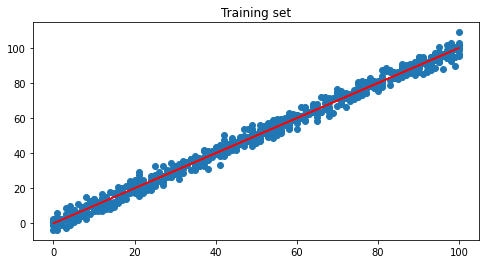

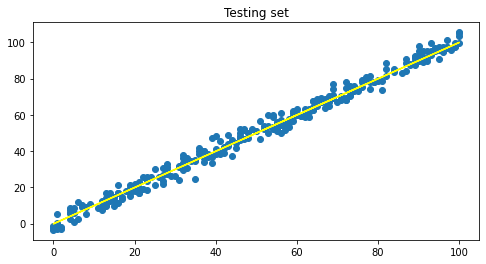

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Training set")
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), c='red')

plt.figure(figsize=(8,4))
plt.title("Testing set")
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), c='yellow')
plt.show()

We remark that our model feet well the both training and testing set.

**Conclusion**: the prediction model can be generalized on new dataset

## 5.4-Model evaluation with loss functions

### 5.4.1 Mean Squared Error (Loss function)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

9.432922192039305


### 5.4.2 Mean Absolute Error

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

2.415771850041258


1.   **MAE = MSE**. All of the errors have the same magnitude.
2. **MAE ≠ MSE** The individual prediction result will always be difference to the global prediction result. The difference between MSE and MAE is greatest when all of the prediction error comes from a single test sample.

# 6-Linear regression with Gradient descent

Here, we will implement our linear regression manually without using the scikit library

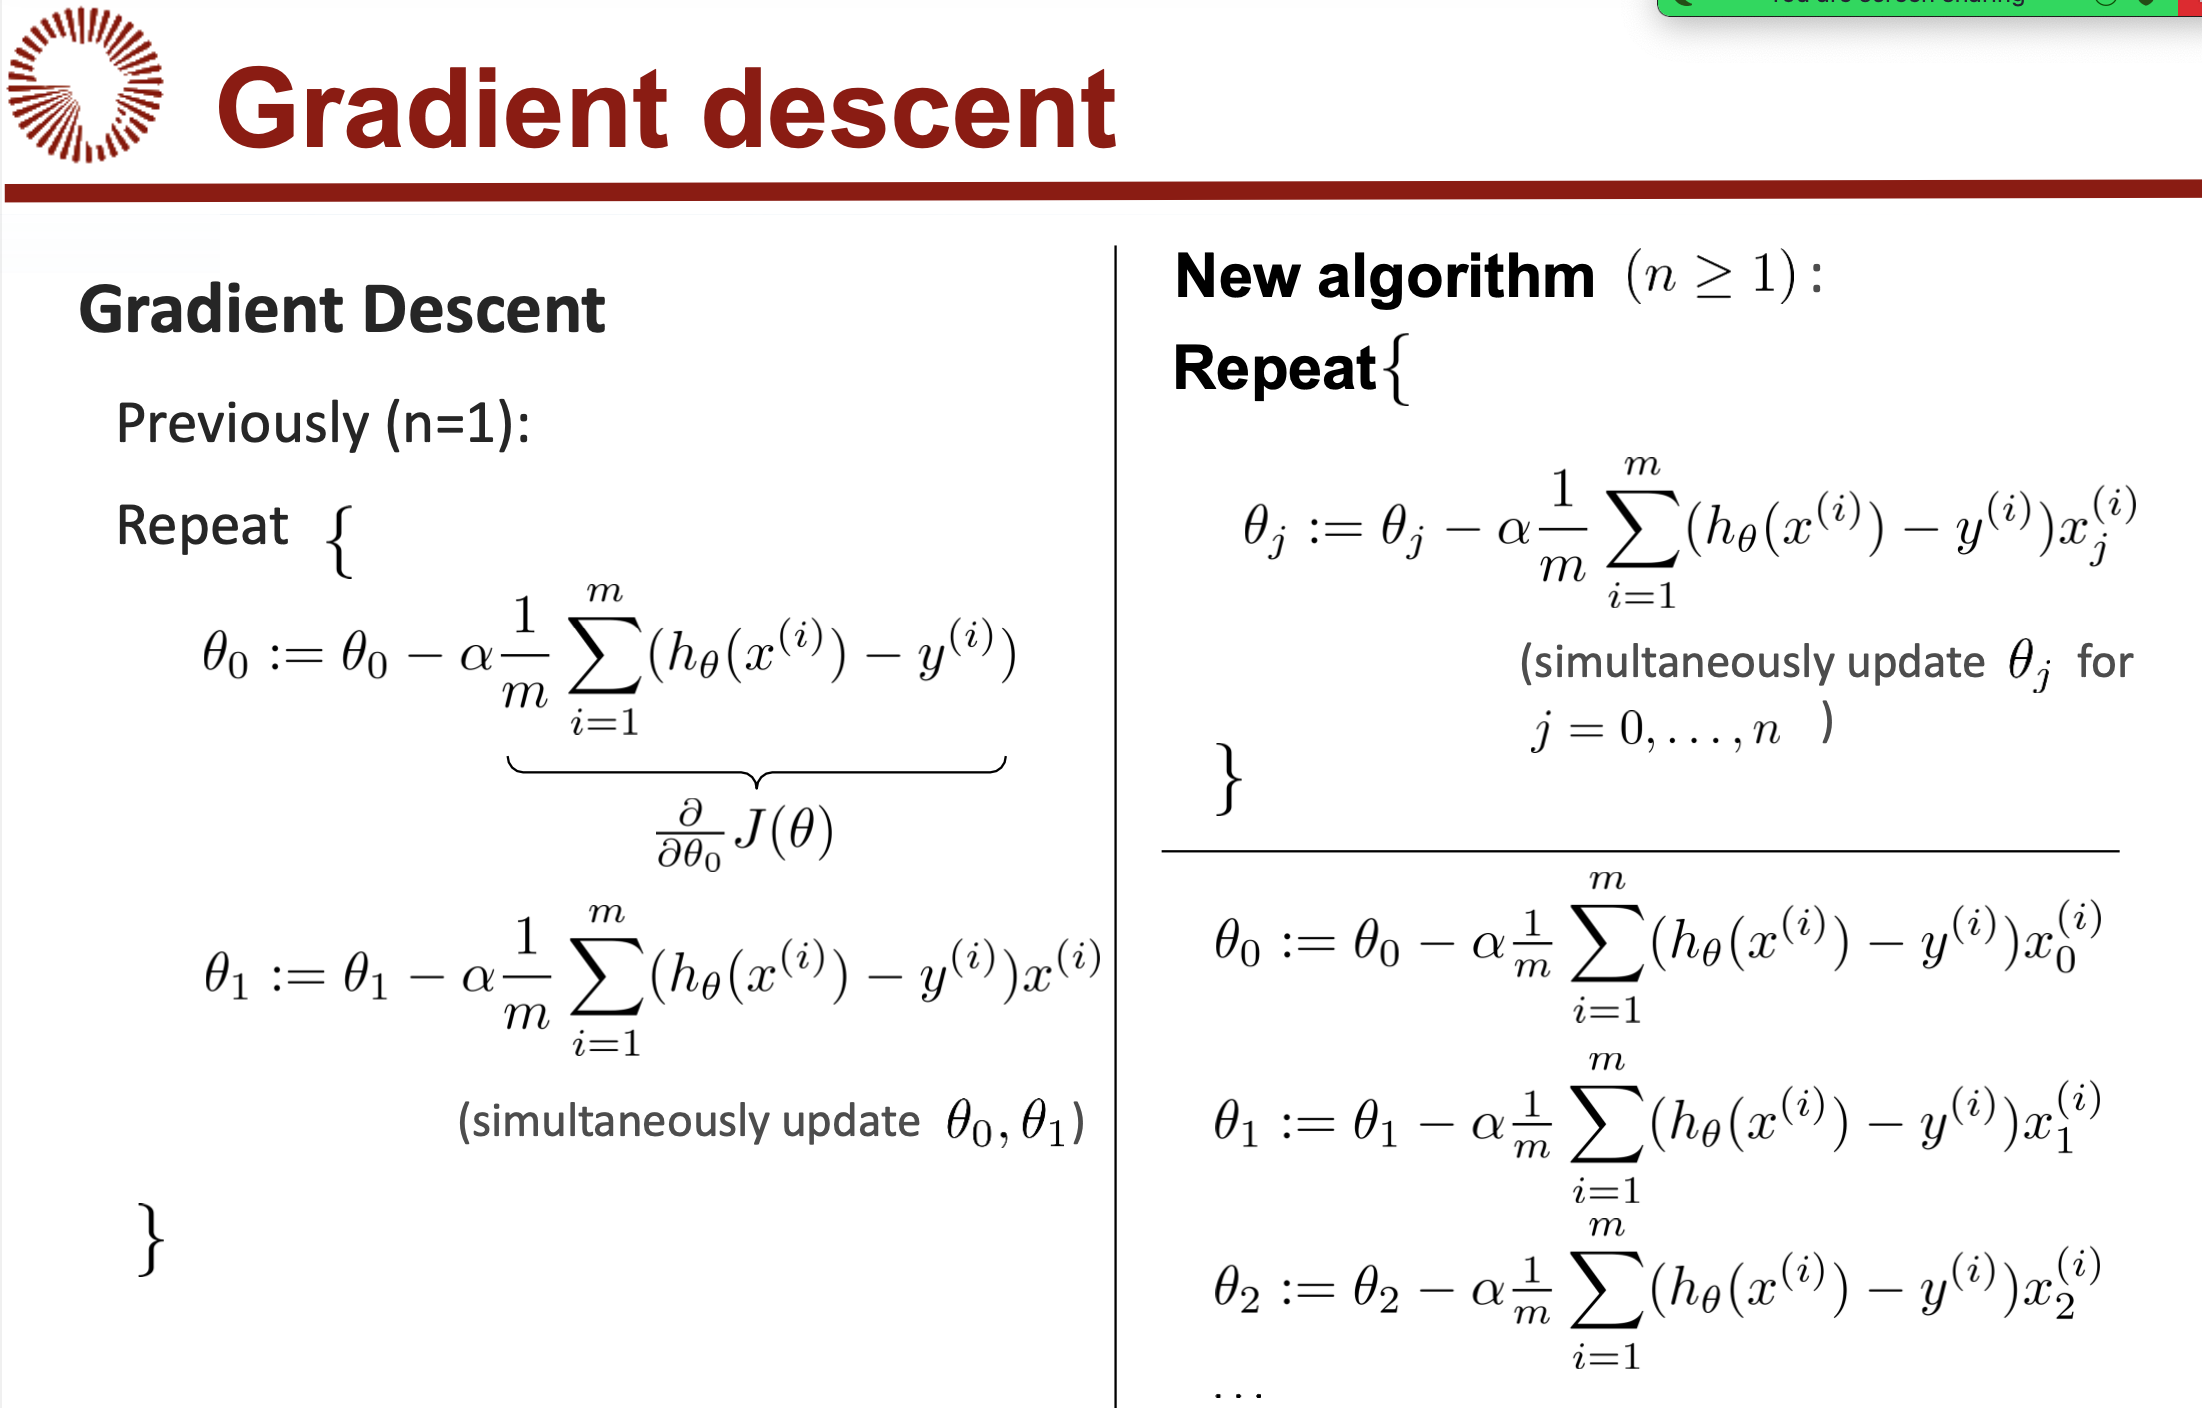

In [ ]:
# Building the model
theta0 = 0
theta1 = 0

lr = 0.00001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = int(len(x_train)) # Number of elements in training dataset

# Performing Gradient Descent
for i in range(epochs):
    y_pred = theta0 + theta1*x_train  # The current predicted value of Y
    D_J_theta0 = (-2/n) * sum(y_train - y_pred)  # Derivative wrt thetao
    D_J_theta1 = (-2/n) * sum(x_train * (y_train - y_pred))  # Derivative wrt theta1
    theta0 = theta0 - lr * D_J_theta0  # Update theta0
    theta1 = theta1 - lr * D_J_theta1  # Update theta1
    if(i%100==0):
      print("iteration ",i,"/",epochs,"=============> theta0= ",theta0[n-1], "theta1= ", theta1[n-1])

iteration  0 / 1000 =============> theta0=  0.0018995053099999807 theta1=  0.09500244011101573
iteration  100 / 1000 =============> theta0=  0.06936644553272185 theta1=  1.4205350549082378
iteration  200 / 1000 =============> theta0=  0.1169598182060399 theta1=  1.421142715899481
iteration  300 / 1000 =============> theta0=  0.1645095814342242 theta1=  1.4204316517970237
iteration  400 / 1000 =============> theta0=  0.21203548966696767 theta1=  1.4197196315243394
iteration  500 / 1000 =============> theta0=  0.25953757450766246 theta1=  1.4190079668601456
iteration  600 / 1000 =============> theta0=  0.3070158479178501 theta1=  1.4182966589317019
iteration  700 / 1000 =============> theta0=  0.35447032183353555 theta1=  1.4175857075614875
iteration  800 / 1000 =============> theta0=  0.40190100818472196 theta1=  1.4168751125707706
iteration  900 / 1000 =============> theta0=  0.449307918895432 theta1=  1.416164873780908


**epochs = number of iteration:**
*   epochs is too big => program will take more times
*   epochs is too small => program will run quickly

**learning rate (le pas) :**
*   learning rate is too small => we will be sure to have the quasi-optimal parameters
*   learning rate is too large => not sure to find the best learning parameters. But it will take more times to converge. And in sometime, the algorithm will be in the infinite loop.


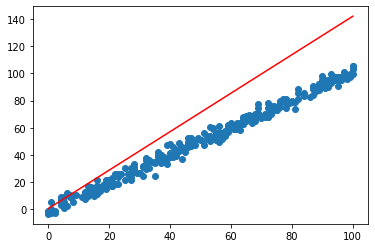

In [ ]:
# Making predictions
y_pred = theta1[n-1]*x_test + theta0[n-1]

plt.scatter(x_test, y_test)
plt.plot([min(x_test), max(x_test)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()

In [ ]:
#Make prediction on test data
df_test['predicted'] = y_pred
df_test

,x,y,predicted
0,77,79.775152,109.486798
1,21,23.177279,30.220921
2,22,25.609262,31.636383
3,20,17.857388,28.805459
4,36,41.849864,51.452853
...,...,...,...
295,71,68.545888,100.994026
296,46,47.334876,65.607473
297,55,54.090637,78.346632
298,62,63.297171,88.254867


#7-Linear regression with the normal equation

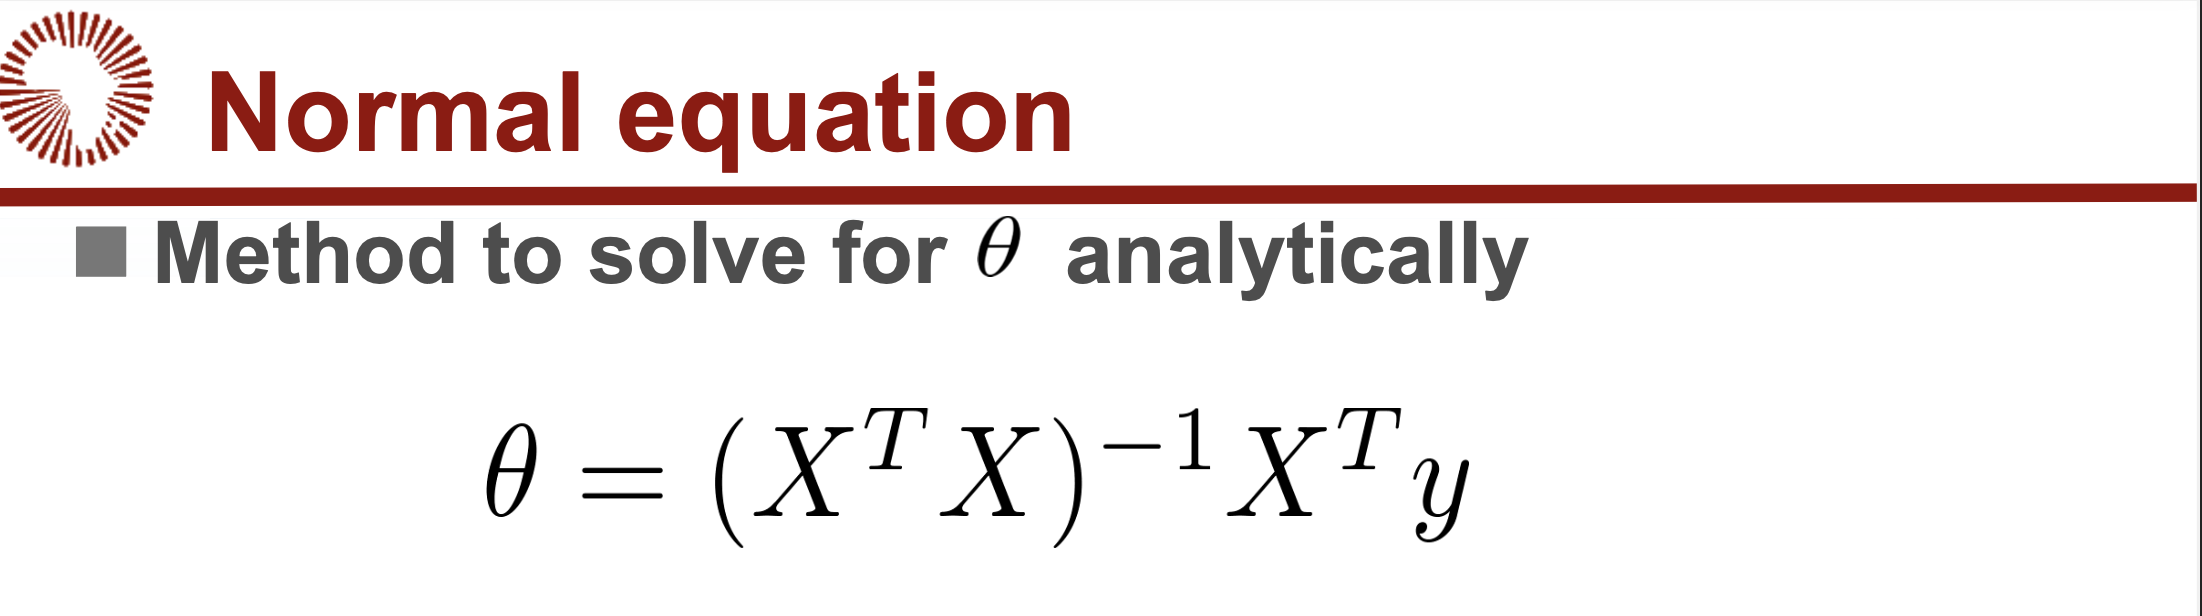

In this section, we will compute the exact optimum parameters theta0 and theta1 by using the normal equation instance of gradient descente

##7.1 Compute the exact optimal values

In [ ]:
n=len(x_train)
x=np.array([np.ones(n), df_train['x'].values]).T
y=y_train
theta=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta

array([-0.10726546,  1.00065638])

We found that:
*   theta0=-0.10726546
*   theta1=1.00065638

These values correspond to the exact optimum values of the learning parameters



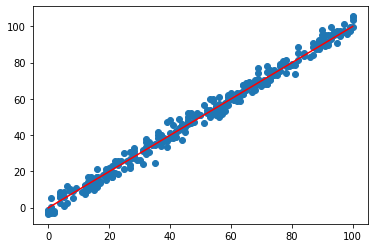

In [ ]:
# Making predictions
y_pred = theta[1]*x_test + theta[0]

plt.scatter(x_test, y_test)
plt.plot([min(x_test), max(x_test)], [min(y_pred), max(y_pred)], color='red') # predicted
plt.show()

# 8-Save and load the model

We use joblib library to save and load the model

In [ ]:
dudump(model, 'sample_data/housepredictor')

saved_model=load('sample_data/housepredictor')

y_pred = saved_model.predict(x_test)
df_test['predicted'] = y_pred
df_test

,x,y,predicted,predicted2
0,77,79.775152,76.943276,76.943276
1,21,23.177279,20.906519,20.906519
2,22,25.609262,21.907175,21.907175
3,20,17.857388,19.905862,19.905862
4,36,41.849864,35.916364,35.916364
...,...,...,...,...
295,71,68.545888,70.939338,70.939338
296,46,47.334876,45.922928,45.922928
297,55,54.090637,54.928836,54.928836
298,62,63.297171,61.933430,61.933430
